In [ ]:
'''for the heat equation
ut = buxx, b > 0, x ∈ (0, 1), t > 0
with initial condition:u(x, 0) = 4x(1 − x), x ∈ (0, 1) and boundary conditions (a) u(0, t) = u(1, t) = 0
and (b) ux(0, t) = ux(1, t) = 0. Test computationally using θ scheme with θ = 0, .5, 1. for b = 1, 2'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Intial condition

def g(x,t):
  if t==0:
    return 4*x*(1-x)
  elif x==0:
    return 0
  elif x==1:
    return 0
 #space points
x=np.linspace(0,1,11)
dx=x[1]-x[0]

 #theta-scheme for part (a)

def theta_scheme_a(r,b,theta):
  #time points
  dt=r*dx*dx
  n_t=round(1/dt)+1
  t=np.linspace(0,1,n_t)

  #matrix A and B
  A=np.zeros([11,11])
  B=np.zeros([11,11])

  for i in range(0,11):
    A[i,i]=1+2*theta*r*b
    B[i,i]=1-2*b*r*(1-theta)
  for i in range(1,11):
    A[i,i-1]=-theta*r*b
    B[i,i-1]=(1-theta)*r*b
  for i in range(0,10):
    A[i,i+1]=-theta*r*b
    B[i,i+1]=(1-theta)*r*b

  #print(A)
  #print(B)

  #going from previous to next time step
  def theta_nxt(v_n):
    v= np.linalg.inv(A)@B@v_n
    v[0]=0
    v[10]=0
    return v


  #getting the solution grid

  u=np.zeros([n_t,11])
  u[0]=[g(i,0) for i in x]
  for i in range(1,n_t):
    u[i]=theta_nxt(u[i-1])

  #print(u)

  #plot the solution

  for i in range(0,n_t):
    plt.plot(x,u[i])






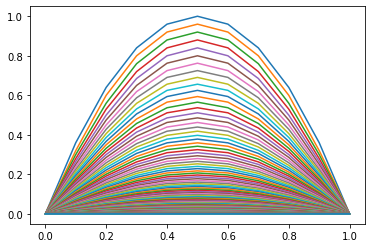

In [ ]:
theta_scheme_a(0.5,1,0)

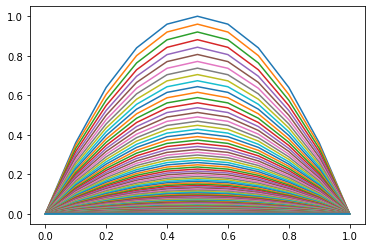

In [ ]:
theta_scheme_a(0.5,1,0.5)

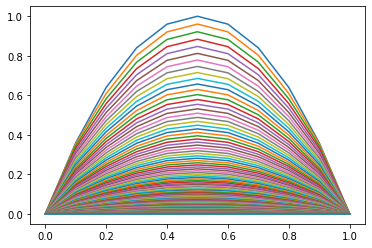

In [ ]:
theta_scheme_a(0.5,1,1)

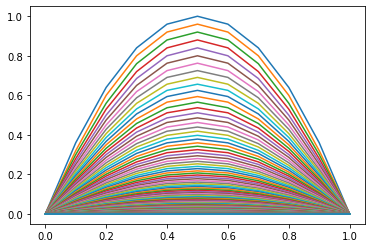

In [ ]:
theta_scheme_a(0.25,2,0)

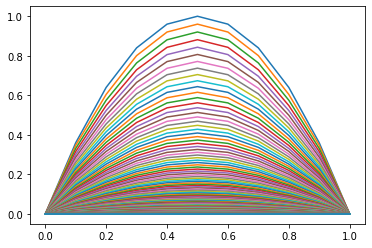

In [ ]:
theta_scheme_a(0.25,2,0.5)

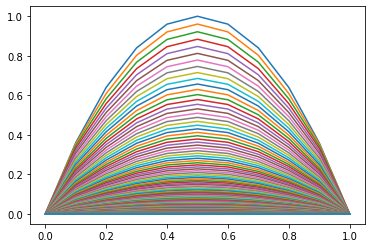

In [ ]:
theta_scheme_a(0.25,2,1)

In [ ]:
# theta scheme for part (b)

#Intial condition

def g(x,t):
  if t==0:
    return 4*x*(1-x)
  elif x==0:
    return 0
  elif x==1:
    return 0
 #space points
x=np.linspace(0,1,11)
dx=x[1]-x[0]

def theta_scheme_b(r,b,theta):
  #time points
  dt=r*dx*dx
  n_t=round(1/dt)+1
  t=np.linspace(0,1,n_t)

  #matrix A and B
  A=np.zeros([11,11])
  B=np.zeros([11,11])

  for i in range(0,11):
    A[i,i]=1+2*theta*r*b
    B[i,i]=1-2*b*r*(1-theta)
  for i in range(1,11):
    A[i,i-1]=-theta*r*b
    B[i,i-1]=(1-theta)*r*b
  for i in range(0,10):
    A[i,i+1]=-theta*r*b
    B[i,i+1]=(1-theta)*r*b

  #print(A)
  #print(B)

  #going from previous to next time step
  def theta_nxt(v_n):
    v= np.linalg.inv(A)@B@v_n
    v[0]=0
    v[10]=0
    return v


  #getting the solution grid

  u=np.zeros([n_t,11])
  u[0]=[g(i,0) for i in x]
  #using the left and right boundary condition
  u[0,0]=u[0,1]
  u[0,-1]=u[0,-2]
  for i in range(1,n_t):
    u[i]=theta_nxt(u[i-1])
    #using the left and right boundary condition
    u[i,0]=u[i,1]
    u[i,-1]=u[i,-2]



  #plot the solution

  for i in range(0,n_t):
    plt.plot(x,u[i])





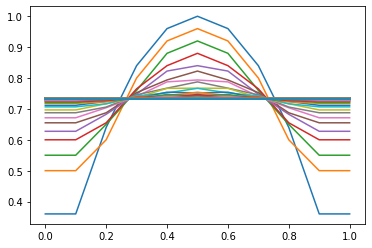

In [ ]:
theta_scheme_b(0.5,1,0)

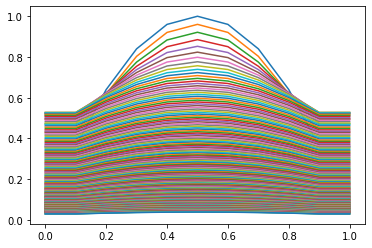

In [ ]:
theta_scheme_b(0.5,1,0.5)

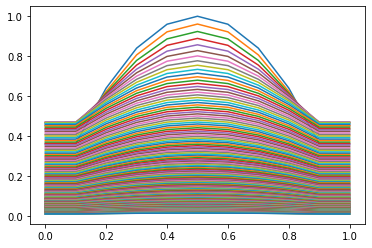

In [ ]:
theta_scheme_b(0.5,1,1)

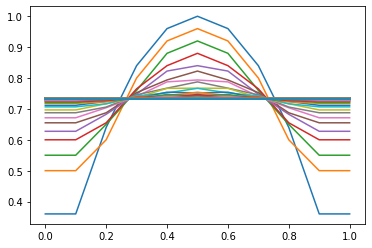

In [ ]:
theta_scheme_b(0.25,2,0)

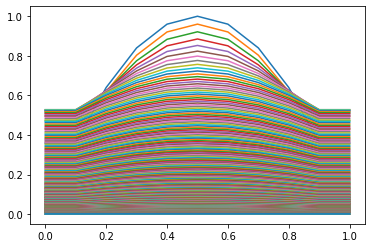

In [ ]:
theta_scheme_b(0.25,2,0.5)

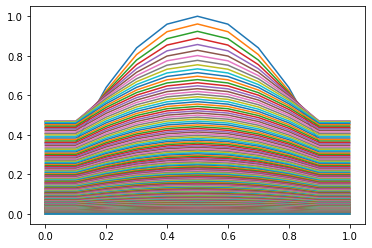

In [ ]:
theta_scheme_b(0.25,2,1)